### 2.1 Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

data_path = 'winequality-red.csv'
column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]
data = pd.read_csv(data_path, sep=';', names=column_names, skiprows=1, engine='python')
data.columns = data.columns.str.strip()

# quick check
print("Fixed Data:")
print(data.head())
print(data.info())

# Data Splitting
X = data.iloc[:, :-1].values # 11 attributes only
y = data.iloc[:, -1].values

model = LinearRegression()
model.fit(X, y)

coefficients = [f"{name}: {coef:.3f}" for name, coef in zip(column_names[:-1], model.coef_)]
print(f"Intercept: {model.intercept_:.3f}, " + ", ".join(coefficients))


n = len(y)
p = X.shape[1]
predictions = model.predict(X)
residuals = y - predictions
rss = np.sum(residuals**2)
sigma_squared = rss / (n - p - 1)
X_with_const = np.hstack([np.ones((X.shape[0], 1)), X])
cov_matrix = np.linalg.inv(X_with_const.T @ X_with_const) * sigma_squared
standard_errors = np.sqrt(np.diag(cov_matrix))

t_stats = model.coef_ / standard_errors[1:]
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p - 1)) for t in t_stats]

p_value_output = [f"{name}: {p_value}" for name, p_value in zip(column_names[:-1], p_values)]
print("P-values: " + ", ".join(p_value_output))

mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Fixed Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9

### 2.2 Data Visulization

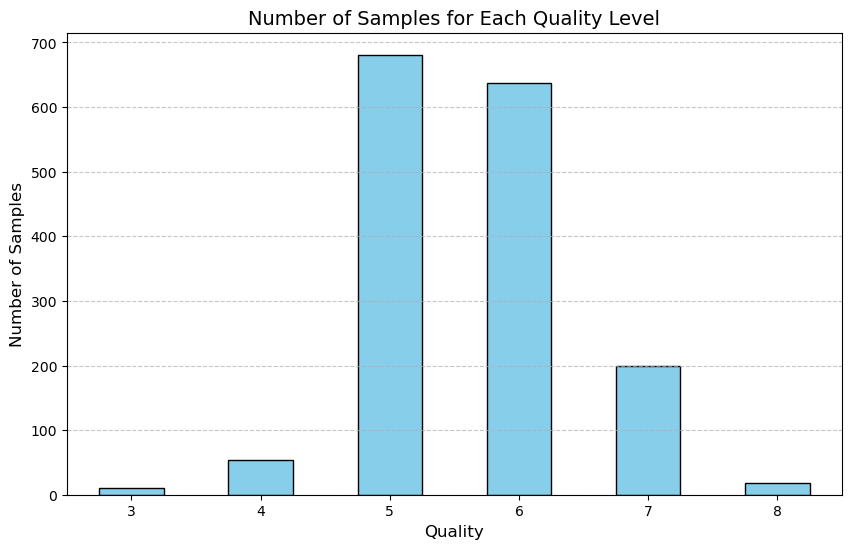

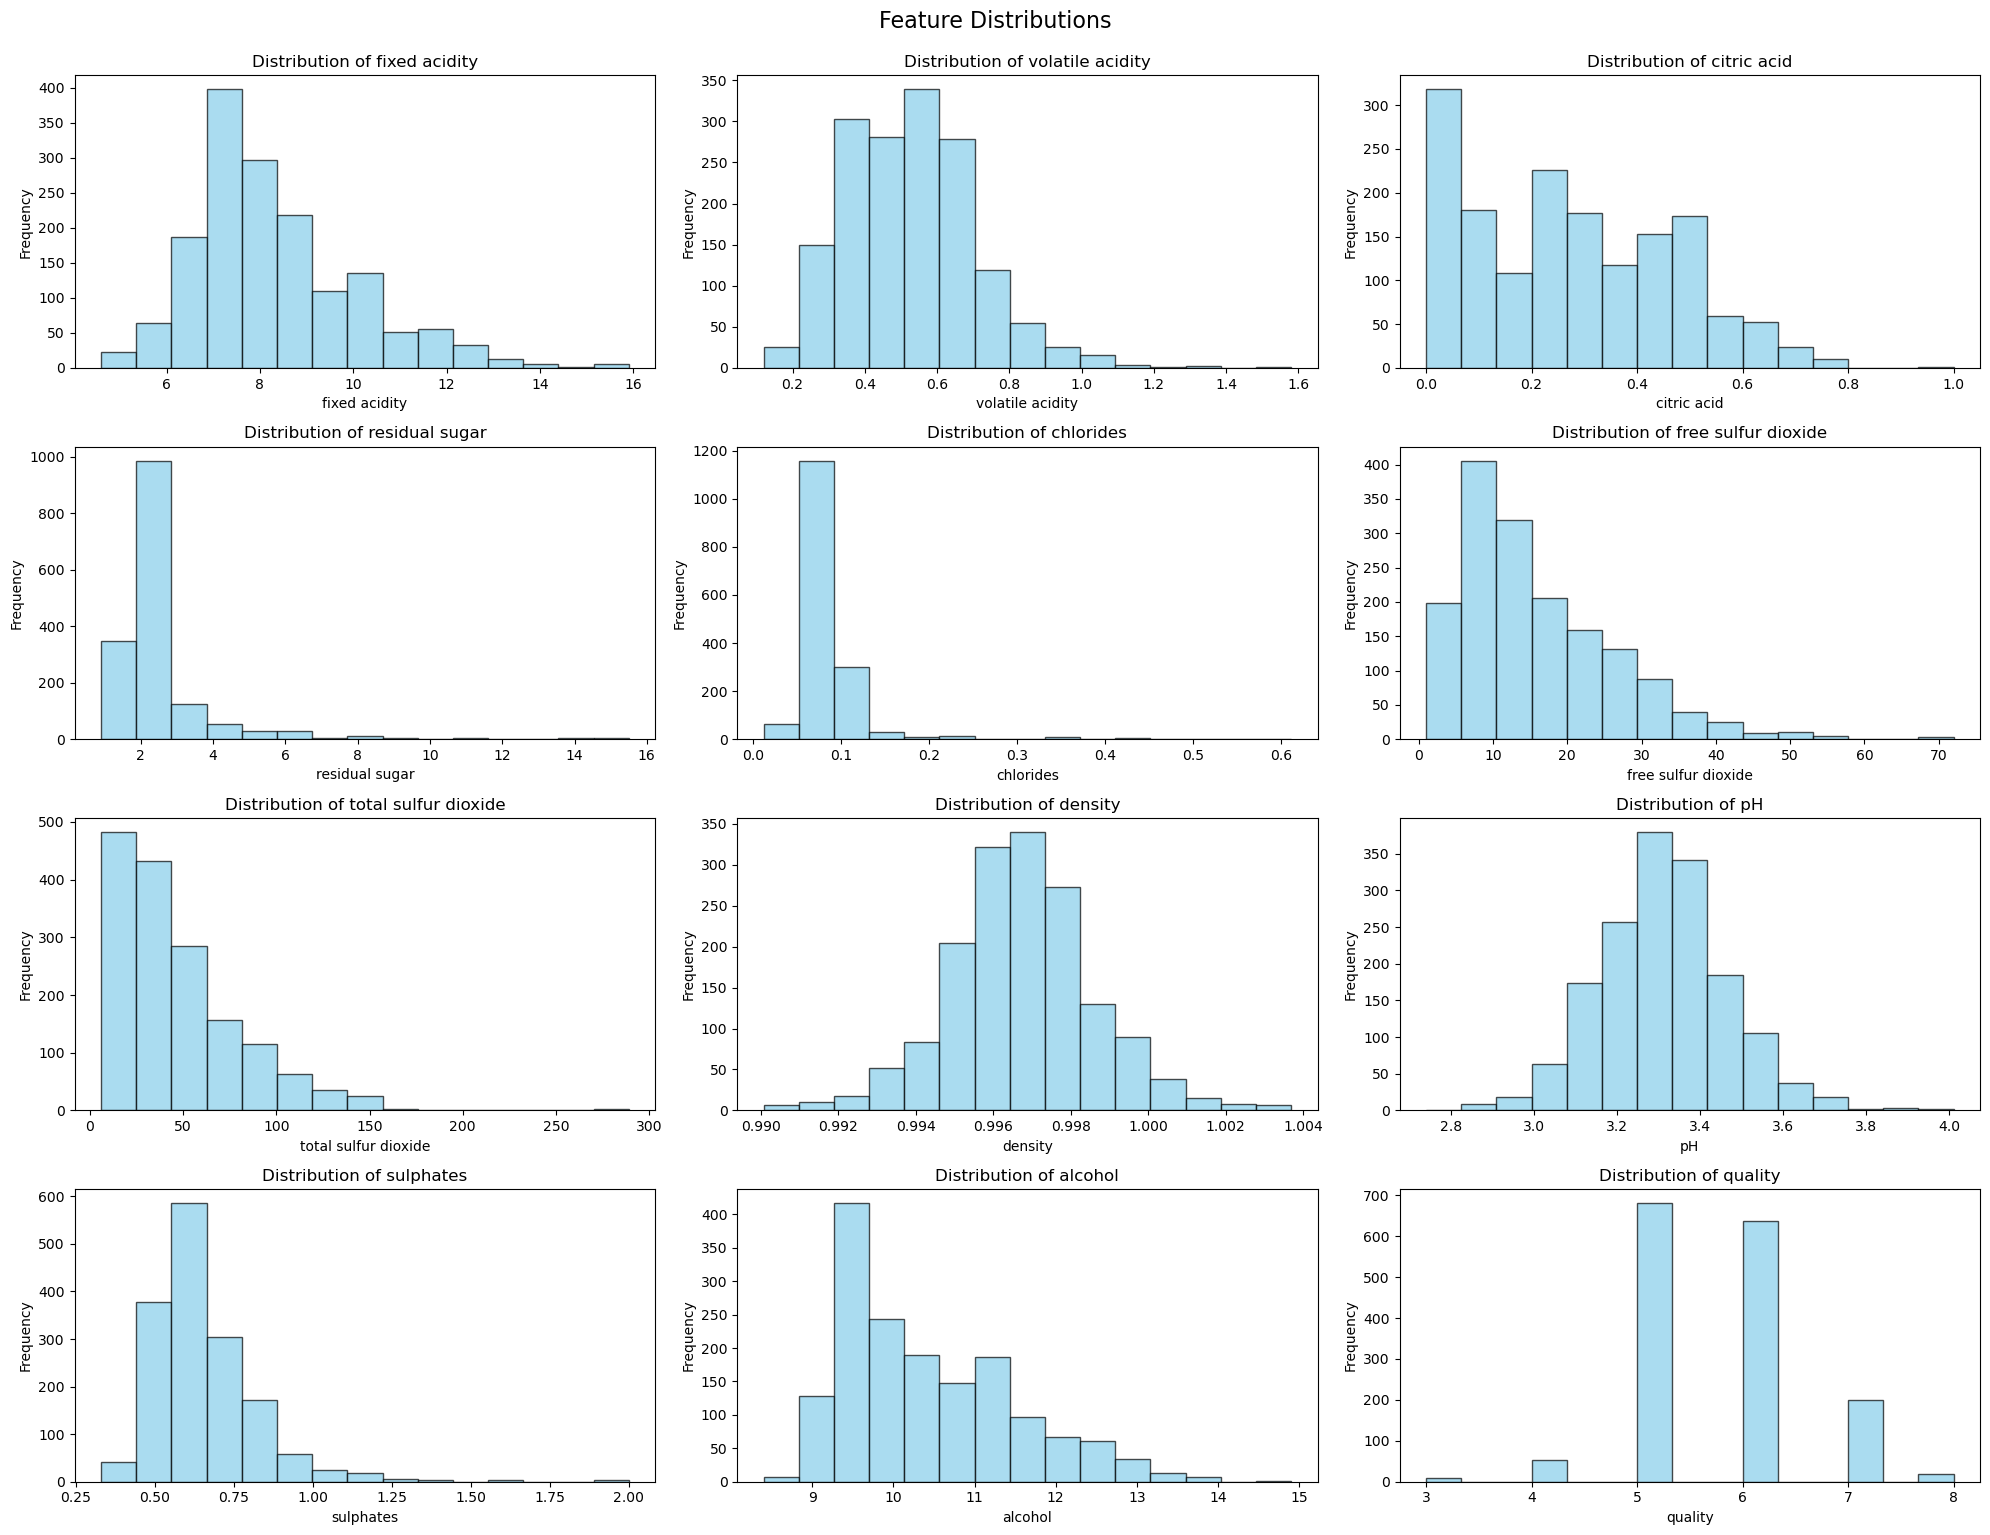

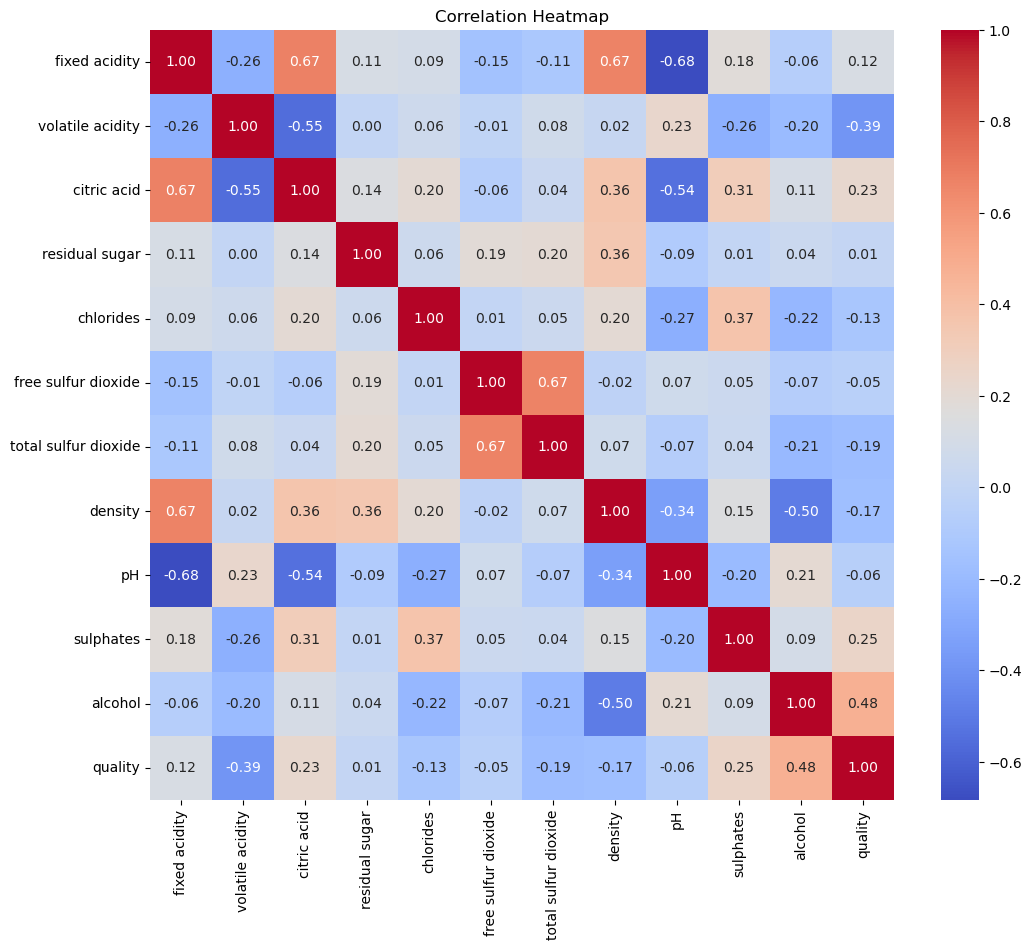

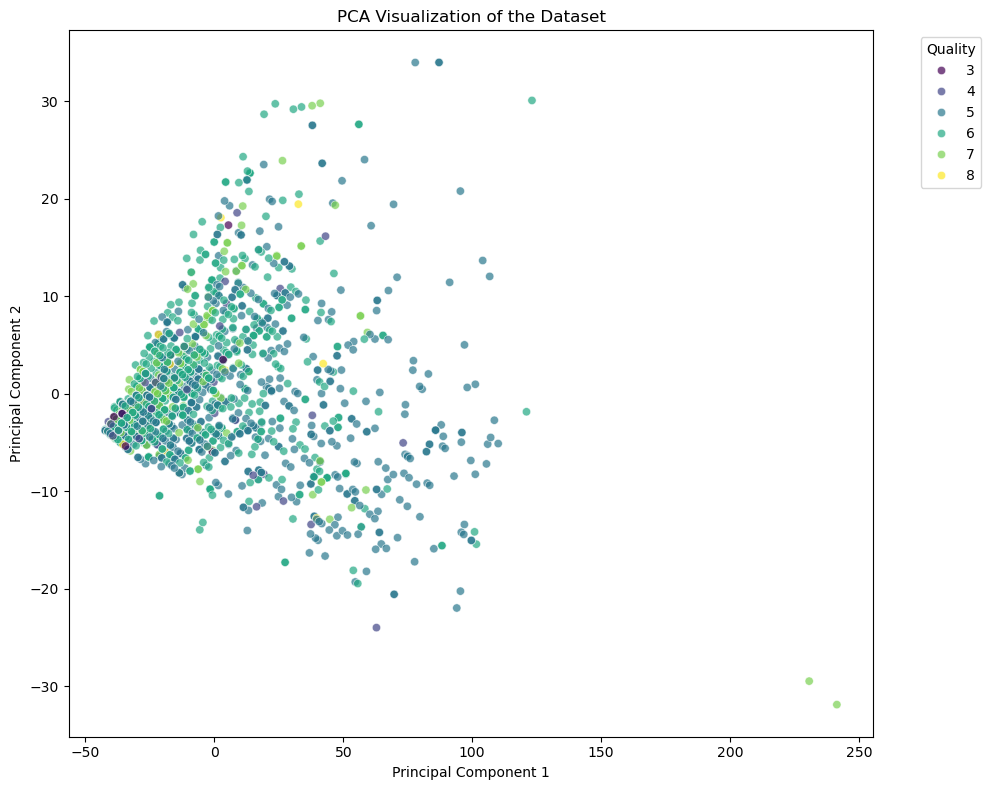

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


data_path = 'winequality-red.csv'
column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]

data = pd.read_csv(data_path, sep=';', names=column_names, skiprows=1, engine='python')
data.columns = data.columns.str.strip()


# ploting the data
plt.figure(figsize=(10, 6))
data['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Samples for Each Quality Level', fontsize=14)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# creat graphs with subplots for better form
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    plt.subplot(4, 3, i + 1)
    plt.hist(data[column], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.suptitle('Feature Distributions', fontsize=16, y=1.02)
plt.show()

# heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# PCA
features = data.iloc[:, :-1]
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_data['Quality'] = data['quality']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Quality', data=pca_data, palette='viridis', alpha=0.7)
plt.title('PCA Visualization of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 2.3 Data Processing

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


data_path = 'winequality-red.csv'
column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]
data = pd.read_csv(data_path, sep=';', names=column_names, skiprows=1, engine='python')
data.columns = data.columns.str.strip()

# log transformation
log_transform_cols = ['volatile acidity', 'chlorides', 'residual sugar', 'sulphates']
for col in log_transform_cols:
    data[col] = np.log1p(data[col])

# PCA reduce dimention
pca = PCA(n_components=5)
X = data.iloc[:, :-1]
X_pca = pca.fit_transform(X)

pca_columns = [f'PCA_Component_{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)
data_pca = pd.concat([pca_df, data[['quality']]], axis=1)

# Normlize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_pca.iloc[:, :-1])
scaled_df = pd.DataFrame(scaled_data, columns=pca_columns)

final_data = pd.concat([scaled_df, data[['quality']]], axis=1)

output_path = 'processed_winequality_data.csv'
final_data.to_csv(output_path, index=False)

print(f"Processed data saved to {output_path}")

Processed data saved to processed_winequality_data.csv


### 3.1.1 ANN raw

In [4]:
import warnings
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample

data_path = 'winequality-red.csv'
column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]
data = pd.read_csv(data_path, sep=';', names=column_names, skiprows=1, engine='python')
data.columns = data.columns.str.strip()

# Timing the process for original data
start_original = time.time()

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# resampling
data_combined = pd.concat([X, y], axis=1)
majority_class = data_combined[data_combined['quality'] == y.value_counts().idxmax()]
minority_classes = data_combined[data_combined['quality'] != y.value_counts().idxmax()]

upsampled_minority = resample(minority_classes, 
                               replace=True, 
                               n_samples=len(majority_class), 
                               random_state=42)

balanced_data = pd.concat([majority_class, upsampled_minority])
X_balanced = balanced_data.iloc[:, :-1]
y_balanced = balanced_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


# hyperparameter opt
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}
mlp = MLPClassifier(max_iter=500, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_mlp = grid_search.best_estimator_

print("\nPerformance without Bagging:")
best_mlp.fit(X_train, y_train)
y_pred_no_bagging = best_mlp.predict(X_test)
print("Accuracy (No Bagging):", accuracy_score(y_test, y_pred_no_bagging))
print(classification_report(y_test, y_pred_no_bagging))


# Bagging ensemble
bagging_mlp = BaggingClassifier(estimator=best_mlp, n_estimators=10, random_state=42)
bagging_mlp.fit(X_train, y_train)
y_pred_bagging = bagging_mlp.predict(X_test)

print("\nPerformance with Bagging:")
print("Accuracy (With Bagging):", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

end_original = time.time()
print(f"\nTime taken for original data: {end_original - start_original:.2f} seconds")


Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}

Performance without Bagging:
Accuracy (No Bagging): 0.6483516483516484
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.68      0.84      0.75       139
           6       0.58      0.53      0.55        99
           7       0.73      0.33      0.46        24
           8       0.00      0.00      0.00         2

    accuracy                           0.65       273
   macro avg       0.33      0.28      0.29       273
weighted avg       0.62      0.65      0.62       273


Performance with Bagging:
Accuracy (With Bagging): 0.6373626373626373
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5   

### 3.1.2 ANN process

In [5]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

processed_data_path = 'processed_winequality_data.csv'
processed_data = pd.read_csv(processed_data_path)

start_unmodified = time.time()

X = processed_data.iloc[:, :-1]
y = processed_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# hyperparameter opt
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}
mlp = MLPClassifier(max_iter=500, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

# evaluation on unmodified dataset
best_mlp_unmodified = grid_search.best_estimator_
best_mlp_unmodified.fit(X_train, y_train)
y_pred_unmodified = best_mlp_unmodified.predict(X_test)
accuracy_unmodified = accuracy_score(y_test, y_pred_unmodified)
print("\nPerformance on Unmodified Dataset:")
print("Accuracy (Unmodified):", accuracy_unmodified)
print(classification_report(y_test, y_pred_unmodified))

end_unmodified = time.time()
print(f"\nTime taken for unmodified data: {end_unmodified - start_unmodified:.2f} seconds")

start_resampled = time.time()

# resampling
data_combined = pd.concat([X, y], axis=1)
majority_class = data_combined[data_combined['quality'] == y.value_counts().idxmax()]
minority_classes = data_combined[data_combined['quality'] != y.value_counts().idxmax()]

from sklearn.utils import resample
upsampled_minority = resample(minority_classes, 
                               replace=True, 
                               n_samples=len(majority_class), 
                               random_state=42)

balanced_data = pd.concat([majority_class, upsampled_minority])
X_balanced = balanced_data.iloc[:, :-1]
y_balanced = balanced_data.iloc[:, -1]

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42)

# hyperparameter opt
grid_search_resampled = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search_resampled.fit(X_train_balanced, y_train_balanced)

# resampled evaluation
best_mlp_resampled = grid_search_resampled.best_estimator_
best_mlp_resampled.fit(X_train_balanced, y_train_balanced)
y_pred_resampled = best_mlp_resampled.predict(X_test_balanced)
accuracy_resampled = accuracy_score(y_test_balanced, y_pred_resampled)
print("\nPerformance on Resampled Dataset:")
print("Accuracy (Resampled):", accuracy_resampled)
print(classification_report(y_test_balanced, y_pred_resampled))

end_resampled = time.time()
print(f"\nTime taken for resampled data: {end_resampled - start_resampled:.2f} seconds")


print("\nAccuracy Comparison:")
print(f"Unmodified Dataset Accuracy: {accuracy_unmodified:.2f}")
print(f"Resampled Dataset Accuracy: {accuracy_resampled:.2f}")

ann_best = max(accuracy_unmodified, accuracy_resampled)


Performance on Unmodified Dataset:
Accuracy (Unmodified): 0.559375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.76      0.67       130
           6       0.52      0.53      0.52       132
           7       0.53      0.24      0.33        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.27      0.25      0.25       320
weighted avg       0.53      0.56      0.53       320


Time taken for unmodified data: 111.69 seconds

Performance on Resampled Dataset:
Accuracy (Resampled): 0.6410256410256411
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.69      0.87      0.77       139
           6       0.57      0.52      0.54     

### 3.1.3 ANN binary classificaition

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

data_path = 'winequality-red.csv'
column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]
data = pd.read_csv(data_path, sep=';', names=column_names, skiprows=1, engine='python')
data.columns = data.columns.str.strip()

# Convert to binary
data['quality'] = data['quality'].apply(lambda x: 0 if x <= 5 else 1)

X = data.iloc[:, :-1]
y = data['quality']

# resampling
data_combined = pd.concat([X, y], axis=1)
majority_class = data_combined[data_combined['quality'] == y.value_counts().idxmax()]
minority_class = data_combined[data_combined['quality'] != y.value_counts().idxmax()]

upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
balanced_data = pd.concat([majority_class, upsampled_minority])

X_balanced = balanced_data.iloc[:, :-1]
y_balanced = balanced_data.iloc[:, -1]

# Normalize features
scaler = MinMaxScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)
X_scaled = scaler.transform(X)

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced_scaled, y_balanced, test_size=0.2, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# gridsearch
mlp = MLPClassifier(max_iter=1000, random_state=42, early_stopping=True)
grid_search_balanced = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search_balanced.fit(X_train_balanced, y_train_balanced)


best_mlp_balanced = grid_search_balanced.best_estimator_
print("Best Hyperparameters (Balanced Binary):", grid_search_balanced.best_params_)

best_mlp_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = best_mlp_balanced.predict(X_test_balanced)
print("\nPerformance on Balanced Dataset (Binary):")
print("Accuracy:", accuracy_score(y_test_balanced, y_pred_balanced))
print(classification_report(y_test_balanced, y_pred_balanced))

# unbalanced data
grid_search_unbalanced = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search_unbalanced.fit(X_train, y_train)

best_mlp_unbalanced = grid_search_unbalanced.best_estimator_
print("Best Hyperparameters (Unbalanced Binary):", grid_search_unbalanced.best_params_)

best_mlp_unbalanced.fit(X_train, y_train)
y_pred_unbalanced = best_mlp_unbalanced.predict(X_test)
print("\nPerformance on Unbalanced Dataset (Binary):")
print("Accuracy:", accuracy_score(y_test, y_pred_unbalanced))
print(classification_report(y_test, y_pred_unbalanced))


print("\nSummary of Results (Binary Classification):")
print(f"Accuracy (Balanced Binary Dataset): {accuracy_score(y_test_balanced, y_pred_balanced):.2f}")
print(f"Accuracy (Unbalanced Binary Dataset): {accuracy_score(y_test, y_pred_unbalanced):.2f}")

ann_best_binary = max(accuracy_score(y_test_balanced, y_pred_balanced), accuracy_score(y_test, y_pred_unbalanced))

Best Hyperparameters (Balanced Binary): {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}

Performance on Balanced Dataset (Binary):
Accuracy: 0.7105263157894737
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       170
           1       0.74      0.65      0.69       172

    accuracy                           0.71       342
   macro avg       0.71      0.71      0.71       342
weighted avg       0.71      0.71      0.71       342

Best Hyperparameters (Unbalanced Binary): {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}

Performance on Unbalanced Dataset (Binary):
Accuracy: 0.73125
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       141
           1       0.80      0.69      0.74       179

    accuracy                           0.73       320


### 3.2.1 SVM raw

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


data_path = 'winequality-red.csv'
column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]

data = pd.read_csv(data_path, sep=';', names=column_names, skiprows=1, engine='python')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Prediction Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.509375
Prediction Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.51      0.55       130
           6       0.46      0.73      0.56       132
           7       1.00      0.02      0.05        42
           8       0.00      0.00      0.00         5

    accuracy                           0.51       320
   macro avg       0.34      0.21      0.19       320
weighted avg       0.56      0.51      0.46       320



### 3.2.2 SVM process

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample


data_path = 'winequality-red.csv'
column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]
data = pd.read_csv(data_path, sep=';', names=column_names, skiprows=1, engine='python')


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Model
base_model = SVC(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
print("Base Model Accuracy:", accuracy_score(y_test, y_pred_base))

# MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaled_model = SVC(random_state=42)
scaled_model.fit(X_train_scaled, y_train)
y_pred_scaled = scaled_model.predict(X_test_scaled)
print("Normalized Model Accuracy:", accuracy_score(y_test, y_pred_scaled))

# StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
std_model = SVC(random_state=42)
std_model.fit(X_train_std, y_train)
y_pred_std = std_model.predict(X_test_std)
print("Standardized Model Accuracy:", accuracy_score(y_test, y_pred_std))

# PCA reduce dimention
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca_model = SVC(random_state=42)
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)
print("PCA Model Accuracy:", accuracy_score(y_test, y_pred_pca))

# GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_std, y_train)

grid_best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_std)
print("GridSearch Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))

# resampling
data_combined = pd.concat([X, y], axis=1)
majority_class = data_combined[data_combined['quality'] == y.value_counts().idxmax()]
minority_classes = data_combined[data_combined['quality'] != y.value_counts().idxmax()]
upsampled_minority = resample(minority_classes, replace=True, n_samples=len(majority_class), random_state=42)
balanced_data = pd.concat([majority_class, upsampled_minority])

X_balanced = balanced_data.iloc[:, :-1]
y_balanced = balanced_data.iloc[:, -1]
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

X_train_balanced_std = std_scaler.fit_transform(X_train_balanced)
X_test_balanced_std = std_scaler.transform(X_test_balanced)

balanced_model = SVC(random_state=42)
balanced_model.fit(X_train_balanced_std, y_train_balanced)
y_pred_balanced = balanced_model.predict(X_test_balanced_std)
print("Balanced Dataset Model Accuracy:", accuracy_score(y_test_balanced, y_pred_balanced))

# Summary of Results
print("\nSummary of Accuracies:")
print(f"Base Model: {accuracy_score(y_test, y_pred_base):.2f}")
print(f"Normalized Model: {accuracy_score(y_test, y_pred_scaled):.2f}")
print(f"Standardized Model: {accuracy_score(y_test, y_pred_std):.2f}")
print(f"PCA Model: {accuracy_score(y_test, y_pred_pca):.2f}")
print(f"GridSearch Optimized Model: {accuracy_score(y_test, y_pred_best):.2f}")
print(f"Balanced Dataset Model: {accuracy_score(y_test_balanced, y_pred_balanced):.2f}")


svm_best = max(accuracy_score(y_test, y_pred_base), 
               accuracy_score(y_test, y_pred_scaled), 
               accuracy_score(y_test, y_pred_std), 
               accuracy_score(y_test, y_pred_pca), 
               accuracy_score(y_test, y_pred_best), 
               accuracy_score(y_test_balanced, y_pred_balanced))

Base Model Accuracy: 0.509375
Normalized Model Accuracy: 0.596875
Standardized Model Accuracy: 0.603125
PCA Model Accuracy: 0.5875
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
GridSearch Optimized Model Accuracy: 0.609375
Balanced Dataset Model Accuracy: 0.6813186813186813

Summary of Accuracies:
Base Model: 0.51
Normalized Model: 0.60
Standardized Model: 0.60
PCA Model: 0.59
GridSearch Optimized Model: 0.61
Balanced Dataset Model: 0.68


### 3.2.3 SVM binary classification

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample


data_path = 'winequality-red.csv'
column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]
data = pd.read_csv(data_path, sep=';', names=column_names, skiprows=1, engine='python')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Model
base_model = SVC(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
print("Base Model Accuracy:", accuracy_score(y_test, y_pred_base))

# MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaled_model = SVC(random_state=42)
scaled_model.fit(X_train_scaled, y_train)
y_pred_scaled = scaled_model.predict(X_test_scaled)
print("Normalized Model Accuracy:", accuracy_score(y_test, y_pred_scaled))

# StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
std_model = SVC(random_state=42)
std_model.fit(X_train_std, y_train)
y_pred_std = std_model.predict(X_test_std)
print("Standardized Model Accuracy:", accuracy_score(y_test, y_pred_std))

# PCA dimension reduce
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca_model = SVC(random_state=42)
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)
print("PCA Model Accuracy:", accuracy_score(y_test, y_pred_pca))

# GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_std, y_train)

grid_best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_std)
print("GridSearch Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))

# resampling
data_combined = pd.concat([X, y], axis=1)
majority_class = data_combined[data_combined['quality'] == y.value_counts().idxmax()]
minority_classes = data_combined[data_combined['quality'] != y.value_counts().idxmax()]
upsampled_minority = resample(minority_classes, replace=True, n_samples=len(majority_class), random_state=42)
balanced_data = pd.concat([majority_class, upsampled_minority])

X_balanced = balanced_data.iloc[:, :-1]
y_balanced = balanced_data.iloc[:, -1]
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

X_train_balanced_std = std_scaler.fit_transform(X_train_balanced)
X_test_balanced_std = std_scaler.transform(X_test_balanced)

balanced_model = SVC(random_state=42)
balanced_model.fit(X_train_balanced_std, y_train_balanced)
y_pred_balanced = balanced_model.predict(X_test_balanced_std)
print("Balanced Dataset Model Accuracy:", accuracy_score(y_test_balanced, y_pred_balanced))

# Summary of Results
print("\nSummary of Accuracies:")
print(f"Base Model: {accuracy_score(y_test, y_pred_base):.2f}")
print(f"Normalized Model: {accuracy_score(y_test, y_pred_scaled):.2f}")
print(f"Standardized Model: {accuracy_score(y_test, y_pred_std):.2f}")
print(f"PCA Model: {accuracy_score(y_test, y_pred_pca):.2f}")
print(f"GridSearch Optimized Model: {accuracy_score(y_test, y_pred_best):.2f}")
print(f"Balanced Dataset Model: {accuracy_score(y_test_balanced, y_pred_balanced):.2f}")

svm_best_binary = max(accuracy_score(y_test, y_pred_base), 
                      accuracy_score(y_test, y_pred_scaled), 
                      accuracy_score(y_test, y_pred_std), 
                      accuracy_score(y_test, y_pred_pca), 
                      accuracy_score(y_test, y_pred_best), 
                      accuracy_score(y_test_balanced, y_pred_balanced))

Base Model Accuracy: 0.509375
Normalized Model Accuracy: 0.596875
Standardized Model Accuracy: 0.603125
PCA Model Accuracy: 0.5875
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
GridSearch Optimized Model Accuracy: 0.609375
Balanced Dataset Model Accuracy: 0.6813186813186813

Summary of Accuracies:
Base Model: 0.51
Normalized Model: 0.60
Standardized Model: 0.60
PCA Model: 0.59
GridSearch Optimized Model: 0.61
Balanced Dataset Model: 0.68


### 3.3.1 random forest

Base Model Accuracy (Raw Data): 0.659375
Normalized Model Accuracy: 0.659375
Standardized Model Accuracy: 0.659375
PCA Model Accuracy: 0.65
Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
GridSearch Optimized Model Accuracy: 0.634375
Balanced Dataset Model Accuracy: 0.8168498168498168

Summary of Accuracies:
Base Model: 0.66
Normalized Model: 0.66
Standardized Model: 0.66
PCA Model: 0.65
GridSearch Optimized Model: 0.63
Balanced Dataset Model: 0.82
Binary Classification Base Model Accuracy: 0.790625
Normalized Binary Model Accuracy: 0.79375


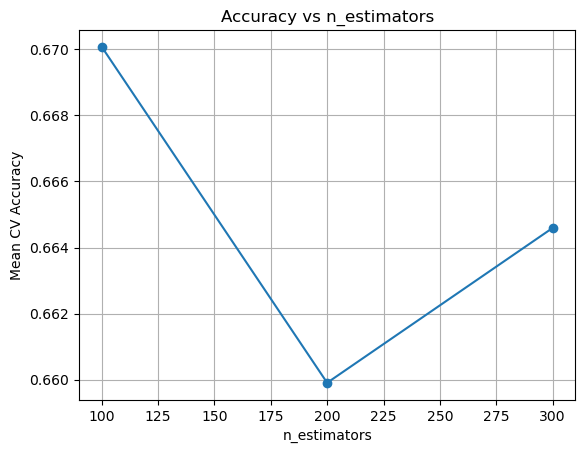

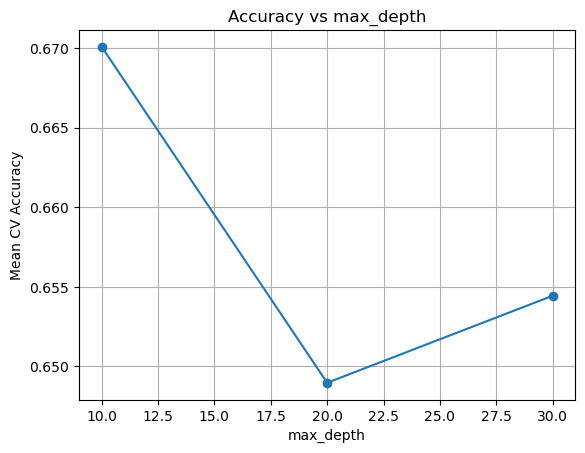

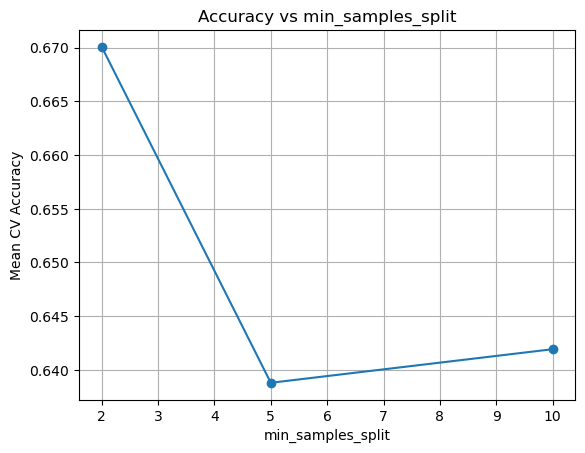

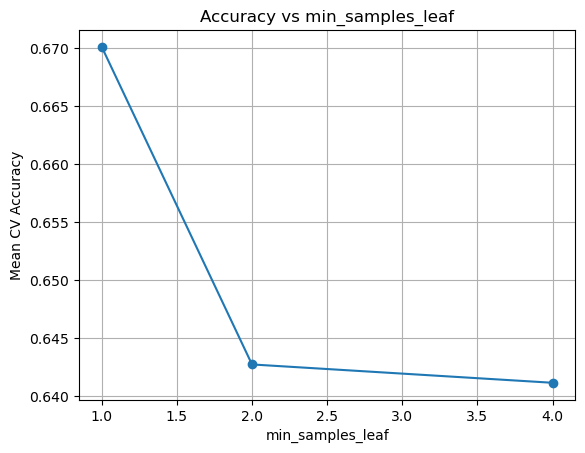

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample


data_path = 'winequality-red.csv'
column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]
data = pd.read_csv(data_path, sep=';', names=column_names, skiprows=1, engine='python')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Model
base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
print("Base Model Accuracy (Raw Data):", accuracy_score(y_test, y_pred_base))

# MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaled_model = RandomForestClassifier(random_state=42)
scaled_model.fit(X_train_scaled, y_train)
y_pred_scaled = scaled_model.predict(X_test_scaled)
print("Normalized Model Accuracy:", accuracy_score(y_test, y_pred_scaled))

# StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
std_model = RandomForestClassifier(random_state=42)
std_model.fit(X_train_std, y_train)
y_pred_std = std_model.predict(X_test_std)
print("Standardized Model Accuracy:", accuracy_score(y_test, y_pred_std))

# PCA dimension reduce
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca_model = RandomForestClassifier(random_state=42)
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)
print("PCA Model Accuracy:", accuracy_score(y_test, y_pred_pca))

# GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train_std, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_pred_best = best_rf_model.predict(X_test_std)
print("GridSearch Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))

# resampling
data_combined = pd.concat([X, y], axis=1)
majority_class = data_combined[data_combined['quality'] == y.value_counts().idxmax()]
minority_classes = data_combined[data_combined['quality'] != y.value_counts().idxmax()]
upsampled_minority = resample(minority_classes, replace=True, n_samples=len(majority_class), random_state=42)
balanced_data = pd.concat([majority_class, upsampled_minority])

X_balanced = balanced_data.iloc[:, :-1]
y_balanced = balanced_data.iloc[:, -1]
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

X_train_balanced_std = std_scaler.fit_transform(X_train_balanced)
X_test_balanced_std = std_scaler.transform(X_test_balanced)

balanced_model = RandomForestClassifier(random_state=42)
balanced_model.fit(X_train_balanced_std, y_train_balanced)
y_pred_balanced = balanced_model.predict(X_test_balanced_std)
print("Balanced Dataset Model Accuracy:", accuracy_score(y_test_balanced, y_pred_balanced))

# Summary of Results
print("\nSummary of Accuracies:")
print(f"Base Model: {accuracy_score(y_test, y_pred_base):.2f}")
print(f"Normalized Model: {accuracy_score(y_test, y_pred_scaled):.2f}")
print(f"Standardized Model: {accuracy_score(y_test, y_pred_std):.2f}")
print(f"PCA Model: {accuracy_score(y_test, y_pred_pca):.2f}")
print(f"GridSearch Optimized Model: {accuracy_score(y_test, y_pred_best):.2f}")
print(f"Balanced Dataset Model: {accuracy_score(y_test_balanced, y_pred_balanced):.2f}")



data['quality'] = (data['quality'] > 5).astype(int)
X_binary = data.iloc[:, :-1]
y_binary = data['quality']


X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

binary_model = RandomForestClassifier(random_state=42)
binary_model.fit(X_train_bin, y_train_bin)
y_pred_bin = binary_model.predict(X_test_bin)
print("Binary Classification Base Model Accuracy:", accuracy_score(y_test_bin, y_pred_bin))

# Normalized Binary Model
X_train_bin_scaled = scaler.fit_transform(X_train_bin)
X_test_bin_scaled = scaler.transform(X_test_bin)
normalized_binary_model = RandomForestClassifier(random_state=42)
normalized_binary_model.fit(X_train_bin_scaled, y_train_bin)
y_pred_bin_scaled = normalized_binary_model.predict(X_test_bin_scaled)
print("Normalized Binary Model Accuracy:", accuracy_score(y_test_bin, y_pred_bin_scaled))


##############################################

cv_results = pd.DataFrame(grid_search.cv_results_)
# To isolate the effect of each parameter, fix other parameters at their best values.
best_params = grid_search.best_params_

def plot_param_performance(param_name, param_values):
    mask = pd.Series([True]*len(cv_results))
    for p, val in best_params.items():
        if p != param_name:
            mask = mask & (cv_results['param_'+p] == val)
    filtered_results = cv_results[mask]
    grouped = filtered_results.groupby('param_'+param_name)['mean_test_score'].mean()
    
    plt.figure()
    grouped.plot(marker='o')
    plt.title(f"Accuracy vs {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Mean CV Accuracy")
    plt.grid(True)
    plt.show()

plot_param_performance('n_estimators', param_grid['n_estimators'])
plot_param_performance('max_depth', param_grid['max_depth'])
plot_param_performance('min_samples_split', param_grid['min_samples_split'])
plot_param_performance('min_samples_leaf', param_grid['min_samples_leaf'])




rf_best = max(accuracy_score(y_test, y_pred_base), 
              accuracy_score(y_test, y_pred_scaled), 
              accuracy_score(y_test, y_pred_std), 
              accuracy_score(y_test, y_pred_pca), 
              accuracy_score(y_test, y_pred_best), 
              accuracy_score(y_test_balanced, y_pred_balanced))

### 3.3.2 random forest binary classification

Binary Classification Base Model Accuracy: 0.790625
Normalized Binary Model Accuracy: 0.79375
Standardized Binary Model Accuracy: 0.7875
PCA Binary Model Accuracy: 0.79375
Best Hyperparameters (Binary): {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
GridSearch Optimized Binary Model Accuracy: 0.8
Balanced Binary Model Accuracy: 0.8859649122807017

Summary of Binary Classification Accuracies:
Base Model: 0.79
Normalized Model: 0.79
Standardized Model: 0.79
PCA Model: 0.79
GridSearch Optimized Model: 0.80
Balanced Model: 0.89


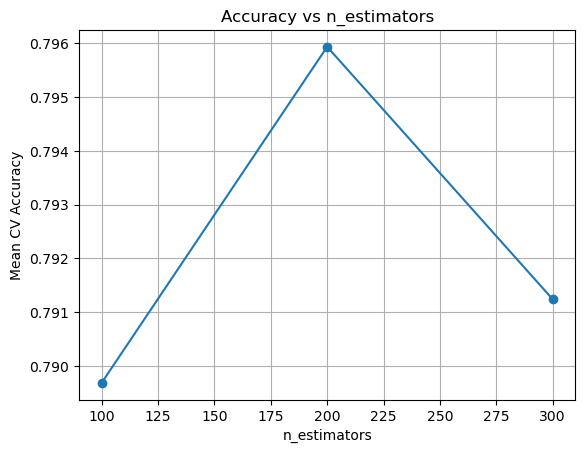

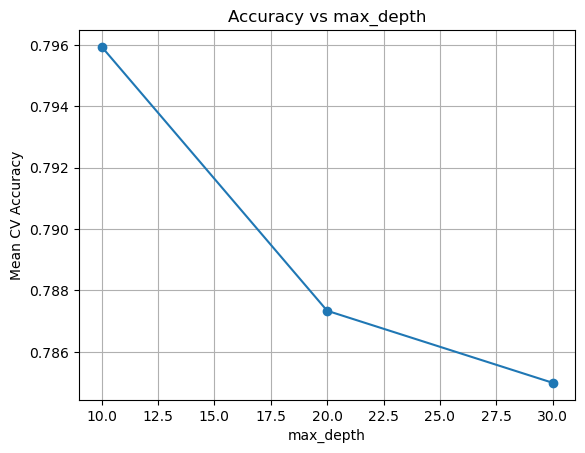

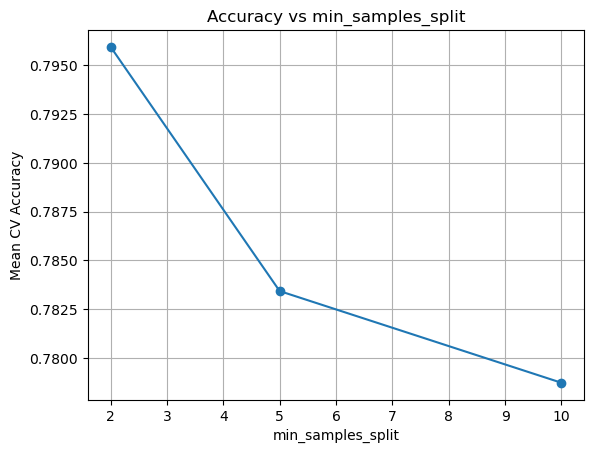

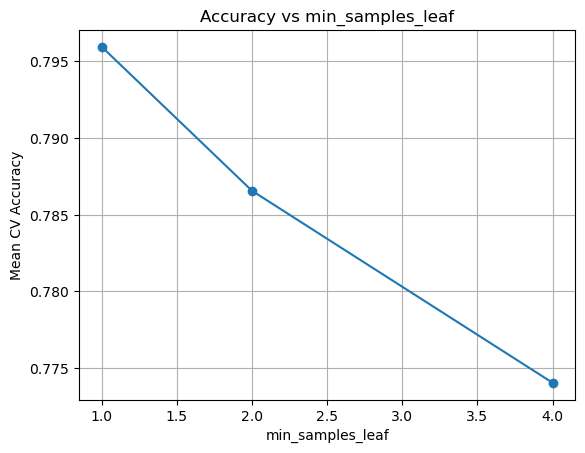

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample


data_path = 'winequality-red.csv'
column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]
data = pd.read_csv(data_path, sep=';', names=column_names, skiprows=1, engine='python')

data['quality'] = (data['quality'] > 5).astype(int)
X = data.iloc[:, :-1]
y = data['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Model
base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
print("Binary Classification Base Model Accuracy:", accuracy_score(y_test, y_pred_base))

# MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaled_model = RandomForestClassifier(random_state=42)
scaled_model.fit(X_train_scaled, y_train)
y_pred_scaled = scaled_model.predict(X_test_scaled)
print("Normalized Binary Model Accuracy:", accuracy_score(y_test, y_pred_scaled))

# StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
std_model = RandomForestClassifier(random_state=42)
std_model.fit(X_train_std, y_train)
y_pred_std = std_model.predict(X_test_std)
print("Standardized Binary Model Accuracy:", accuracy_score(y_test, y_pred_std))

# PCA reduce dimension
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca_model = RandomForestClassifier(random_state=42)
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)
print("PCA Binary Model Accuracy:", accuracy_score(y_test, y_pred_pca))

# GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train_std, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters (Binary):", grid_search.best_params_)

y_pred_best = best_rf_model.predict(X_test_std)
print("GridSearch Optimized Binary Model Accuracy:", accuracy_score(y_test, y_pred_best))

# 6 resampling
data_combined = pd.concat([X, y], axis=1)
majority_class = data_combined[data_combined['quality'] == y.value_counts().idxmax()]
minority_class = data_combined[data_combined['quality'] != y.value_counts().idxmax()]
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
balanced_data = pd.concat([majority_class, upsampled_minority])

X_balanced = balanced_data.iloc[:, :-1]
y_balanced = balanced_data.iloc[:, -1]
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

X_train_balanced_std = std_scaler.fit_transform(X_train_balanced)
X_test_balanced_std = std_scaler.transform(X_test_balanced)

balanced_model = RandomForestClassifier(random_state=42)
balanced_model.fit(X_train_balanced_std, y_train_balanced)
y_pred_balanced = balanced_model.predict(X_test_balanced_std)
print("Balanced Binary Model Accuracy:", accuracy_score(y_test_balanced, y_pred_balanced))

# Summary of Results
print("\nSummary of Binary Classification Accuracies:")
print(f"Base Model: {accuracy_score(y_test, y_pred_base):.2f}")
print(f"Normalized Model: {accuracy_score(y_test, y_pred_scaled):.2f}")
print(f"Standardized Model: {accuracy_score(y_test, y_pred_std):.2f}")
print(f"PCA Model: {accuracy_score(y_test, y_pred_pca):.2f}")
print(f"GridSearch Optimized Model: {accuracy_score(y_test, y_pred_best):.2f}")
print(f"Balanced Model: {accuracy_score(y_test_balanced, y_pred_balanced):.2f}")



##############################################
cv_results = pd.DataFrame(grid_search.cv_results_)
# To isolate the effect of each parameter, fix other parameters at their best values.
best_params = grid_search.best_params_

def plot_param_performance(param_name, param_values):
    mask = pd.Series([True]*len(cv_results))
    for p, val in best_params.items():
        if p != param_name:
            mask = mask & (cv_results['param_'+p] == val)
    filtered_results = cv_results[mask]

    grouped = filtered_results.groupby('param_'+param_name)['mean_test_score'].mean()
    
    plt.figure()
    grouped.plot(marker='o')
    plt.title(f"Accuracy vs {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Mean CV Accuracy")
    plt.grid(True)
    plt.show()

plot_param_performance('n_estimators', param_grid['n_estimators'])
plot_param_performance('max_depth', param_grid['max_depth'])
plot_param_performance('min_samples_split', param_grid['min_samples_split'])
plot_param_performance('min_samples_leaf', param_grid['min_samples_leaf'])

rf_best_binary = max(accuracy_score(y_test, y_pred_base), 
                     accuracy_score(y_test, y_pred_scaled), 
                     accuracy_score(y_test, y_pred_std), 
                     accuracy_score(y_test, y_pred_pca), 
                     accuracy_score(y_test, y_pred_best), 
                     accuracy_score(y_test_balanced, y_pred_balanced))

### 4.1 Results and Analysis

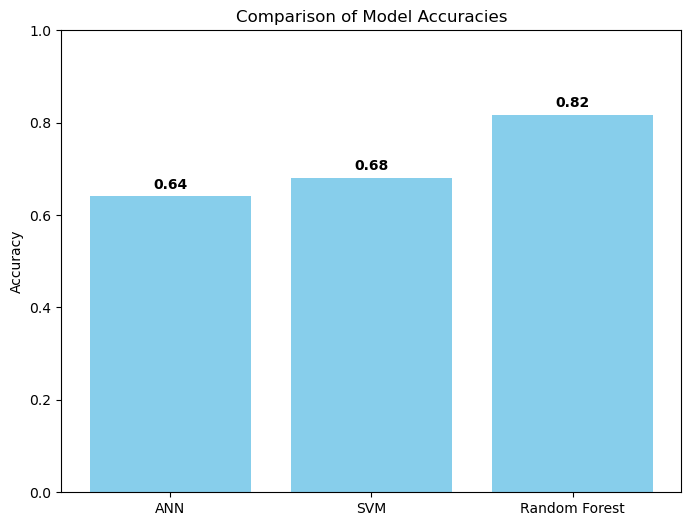

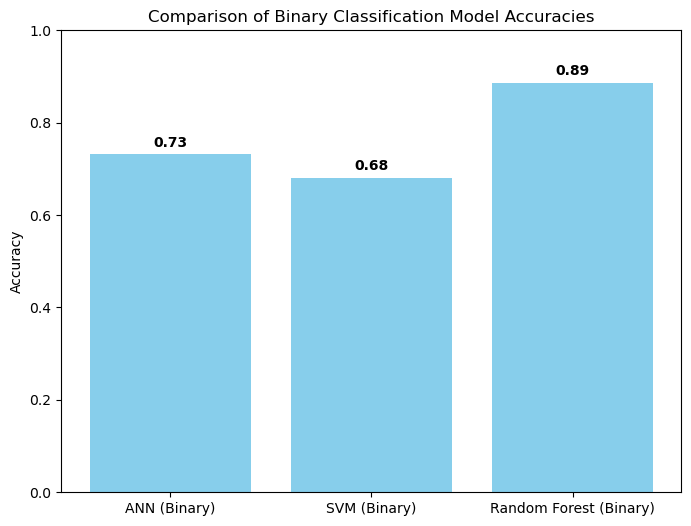

In [12]:
models = ['ANN', 'SVM', 'Random Forest']
accuracies = [ann_best, svm_best, rf_best]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.show()

models_binary = ['ANN (Binary)', 'SVM (Binary)', 'Random Forest (Binary)']
accuracies_binary = [ann_best_binary, svm_best_binary, rf_best_binary]

plt.figure(figsize=(8, 6))
bars_binary = plt.bar(models_binary, accuracies_binary, color='skyblue')
plt.title('Comparison of Binary Classification Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar in bars_binary:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.show()